<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=300 height=300 align=left class="saturate" >

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 1 - Search <br>
<font color=696880 size=4>
<div dir=ltr>
Dorsa Ghobadi



____

# Personal Data

In [62]:
# Set your student number
student_number = '400100616'
Name = 'Setayesh'
Last_Name = 'Esteki'

# Rules
- Make sure that all of your cells can be run perfectly.
-Do not change the Parts which are not marked with #TODO
-Complete the functions or parts that are marked with #TODO
-Feel free to add functions if you need!

## Libraries

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from queue import Queue, LifoQueue, PriorityQueue
import random


# Uninformed & Informed Search

<font size=4>
Author: Dorsa Ghobadi
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

## Problem Definition

In This Problem, We want to investigate Maze Problem with the focus on implementing BFS,DFS and A-Star algorithm to solve it. This notebook is inspired by the [pacman](https://freepacman.org/) game. We generate a random maze and put the pacman in the top left crner and the food in the bottom right corner. The goal is to find a way from the pacman to the food using different search algorithms.



## Code

In [64]:
def generate_maze(rows, cols, wall_prob=0.3):
    np.random.seed(40)
    maze = np.random.choice([0, 1], size=(rows, cols), p=[1-wall_prob, wall_prob])
    start = (0, 0)
    goal = (rows-1, cols-1)
    maze[start] = 0
    maze[goal] = 0
    return maze, start, goal

def plot_maze(maze, path=None, start=None, goal=None):
    plt.imshow(maze, cmap="gray")
    if path:
        x, y = zip(*path)
        plt.plot(y, x, color='yellow', linewidth=2)  # Plot path in yellow
    if start:
        plt.scatter(start[1], start[0], color='blue', s=100, label='Pacman')  # Pacman start
    if goal:
        plt.scatter(goal[1], goal[0], color='green', s=100, label='Food')  # Food
    plt.legend()
    plt.show()

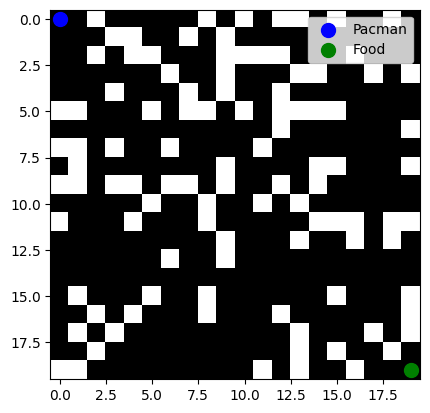

In [65]:
rows, cols = 20, 20
maze, start, goal = generate_maze(rows, cols)
plot_maze(maze, start=start, goal=goal)


In [66]:
class SearchAlgorithm:
    def __init__(self, maze):
        self.maze = maze
        self.rows, self.cols = maze.shape
        self.visited = np.zeros_like(maze)
        self.expanded_nodes = 0

    def get_neighbors(self, pos):
        neighbors = []
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
        for d in directions:
            new_pos = (pos[0] + d[0], pos[1] + d[1])
            if 0 <= new_pos[0] < self.rows and 0 <= new_pos[1] < self.cols and not self.maze[new_pos] and not self.visited[new_pos]:
                neighbors.append(new_pos)
        return neighbors
    def reconstruct_path(self, parent_map, start, goal):
        path = [goal]
        while path[-1] != start:
            path.append(parent_map[path[-1]])
        path.reverse()
        return path


In [67]:
def plot_algorithm(maze, start, goal,name,algorithm):
  path = algorithm.search(start, goal)
  result = {'path': path, 'expanded_nodes': algorithm.expanded_nodes}
  print(f"{name}: Expanded Nodes = {algorithm.expanded_nodes}")
  plot_maze(maze, path, start, goal)



In [68]:
class DFS(SearchAlgorithm):
    def search(self, start, goal):
        stack = [start]
        parent_map = {}
        self.visited[start] = 1
        self.expanded_nodes = 0

        while stack:
            current = stack.pop()
            self.expanded_nodes += 1

            if current == goal:
                return self.reconstruct_path(parent_map, start, goal)

            for neighbor in self.get_neighbors(current):
                if not self.visited[neighbor]:
                    self.visited[neighbor] = 1
                    parent_map[neighbor] = current
                    stack.append(neighbor)

        return None  # No path found



DFS: Expanded Nodes = 181


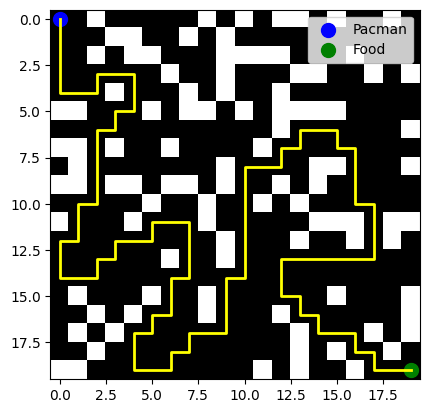

In [69]:
plot_algorithm(maze,start,goal,'DFS', DFS(maze))

In [70]:
from collections import deque

class BFS(SearchAlgorithm):
    def search(self, start, goal):
        queue = deque([start])  # Use deque as a queue for BFS
        parent_map = {}
        self.visited[start] = 1
        self.expanded_nodes = 0

        while queue:
            current = queue.popleft()  # Pop from the front (BFS)
            self.expanded_nodes += 1

            if current == goal:
                return self.reconstruct_path(parent_map, start, goal)

            for neighbor in self.get_neighbors(current):
                if not self.visited[neighbor]:
                    self.visited[neighbor] = 1
                    parent_map[neighbor] = current
                    queue.append(neighbor)

        return None  # No path found

    


BFS: Expanded Nodes = 280


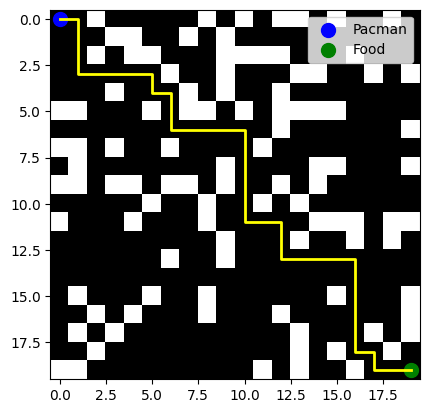

In [71]:
plot_algorithm(maze,start,goal,'BFS', BFS(maze))

Question:

So far, we have explored three uninformed search methods: DFS, BFS. Briefly explain the advantages and disadvantages of each method in the context of the Maze Problem and compare their performance based on your observations (consider both time and memory).

#### **DFS (Depth-First Search)** 
1. **Advantages**:
* **Low memory usage**: DFS only stores the current path being explored, making it more memory-efficient compared to BFS, which needs to store all nodes at each level of the tree.
* **Can be fast for certain types of mazes**: In cases where the solution is located deep along one path, DFS can find the solution quickly without needing to explore all other paths.
2. **Disadvantages**:
* **Does not guarantee the shortest path**: DFS explores as deep as possible before backtracking, meaning it could find a solution that is not the shortest path. In a maze, this could result in a much longer path than necessary.
* **May get stuck in deep, convoluted paths**: If the maze has long paths without solutions, DFS can take a long time to backtrack and find the correct route.
3. **Performance in terms of time and memory**:
 * **Time**: DFS can be faster in some cases if the solution happens to be found early in the deep exploration, but generally, it is less efficient than BFS for finding the shortest path.
 * **Memory**: DFS requires less memory than BFS since it doesn’t need to store the whole frontier, only the current path.
#### **BFS (Breadth-First Search)** 
1. **Advantages**:
* **Guarantees the shortest path**: BFS explores all nodes level by level, ensuring that it finds the shortest path in terms of the number of moves from the start to the goal.
* **Complete for finite graphs**: BFS will always find a solution if one exists because it explores all possible paths systematically.
2. **Disadvantages**:
* **High memory usage**: BFS needs to store all nodes at the current level of the search in memory, which can be large for wide or dense mazes. 
* **Potentially slow for large mazes**: Since BFS explores every possible path at each level, it can take longer to find the goal if the maze is large or complex. 
3. **Performance in terms of time and memory**: 
* **Time**: BFS can take longer to reach the goal if the maze is large, but it will always find the optimal solution. 
* **Memory**: BFS uses significantly more memory than DFS, as it stores all the frontier nodes at each level.

In [72]:
import heapq

class AStar(SearchAlgorithm):
    def heuristic(self, pos, goal):
        # Use Manhattan distance as the heuristic
        return abs(pos[0] - goal[0]) + abs(pos[1] - goal[1])

    def search(self, start, goal):
        priority_queue = []
        heapq.heappush(priority_queue, (0, start))  # (priority, position)
        parent_map = {}
        g_costs = {start: 0}  # Cost from start to the node
        self.visited = np.zeros_like(self.maze)
        self.expanded_nodes = 0

        while priority_queue:
            current_priority, current = heapq.heappop(priority_queue)
            self.expanded_nodes += 1

            if current == goal:
                return self.reconstruct_path(parent_map, start, goal)

            for neighbor in self.get_neighbors(current):
                new_g_cost = g_costs[current] + 1  # Assume each step has a cost of 1
                if neighbor not in g_costs or new_g_cost < g_costs[neighbor]:
                    g_costs[neighbor] = new_g_cost
                    f_cost = new_g_cost + self.heuristic(neighbor, goal)  # f = g + h
                    heapq.heappush(priority_queue, (f_cost, neighbor))
                    parent_map[neighbor] = current
                    self.visited[neighbor] = 1

        return None  # No path found



A*: Expanded Nodes = 169


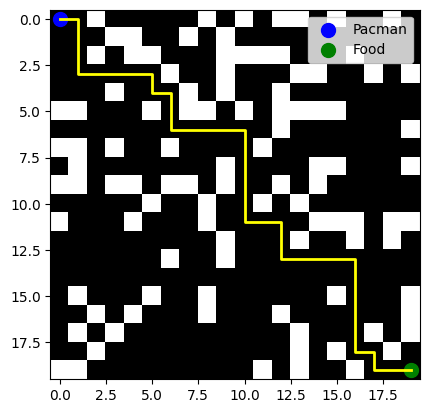

In [73]:
plot_algorithm(maze,start,goal,'A*', AStar(maze))

Question:

Explain your heuristic and observation's result. Also, compare the A* method with Uniformed search in the context of the Maze problem.

### Heuristic Explanation in A* and Observations

In the **A*** algorithm, the **heuristic** function plays a vital role in guiding the search towards the goal by estimating the cost to reach the goal from the current node. For the Maze problem, I used the **Manhattan distance** heuristic, which is calculated as follows:

\[
h(pos, goal) = |pos_x - goal_x| + |pos_y - goal_y|
\]

This heuristic works well in grid-based environments (like mazes) where movements are restricted to horizontal and vertical directions, making it a good estimator of the distance to the goal in the absence of obstacles.

#### **Why the Manhattan Distance Works for Mazes**:
- **Manhattan distance** assumes a grid where movement is constrained to four directions: up, down, left, and right.
- It provides a lower bound (underestimates) for the cost to reach the goal, which is crucial in A* as it helps guide the search while ensuring that the algorithm remains **admissible** (guaranteeing an optimal path).
- Since we assume no diagonal movements and constant costs for moving between adjacent cells (ignoring the walls), this heuristic gives a close approximation of the actual path length in terms of moves, and it performs well in most grid-based problems.

#### **Observations**:
- **A*** efficiently reduces the search space by expanding nodes that seem more promising in terms of both actual cost (g-cost) and heuristic (h-cost). This leads to fewer expanded nodes compared to BFS, especially in large mazes.
- The Manhattan distance heuristic performs effectively for guiding A* towards the goal, particularly in cases where there are no significant obstacles or complex detours in the maze.
- In cases where the maze is highly complex (many walls and obstacles), A* still outperforms BFS because it uses the heuristic to focus on paths that are likely to lead to the goal, avoiding unnecessary exploration of distant or irrelevant areas.

### A* vs Uninformed Search (DFS, BFS) in the Context of the Maze Problem

#### **1. Uninformed Search (DFS and BFS)**

**Uninformed search algorithms**, such as DFS and BFS, do not use any information about the problem domain to guide the search. These algorithms explore the maze blindly, meaning they rely solely on their inherent search mechanism (depth-first or breadth-first) without estimating which paths are more promising.

##### **DFS (Depth-First Search)**
- **Strategy**: DFS dives deep into the maze before backtracking.
- **Advantages**:
  - **Low memory usage**: DFS only needs to store the current path, making it memory-efficient.
  - **Simple to implement**.
- **Disadvantages**:
  - **Does not guarantee the shortest or least-costly path**: DFS can find a solution, but it may be far from optimal. It might explore long and costly paths first, making it inefficient in the context of minimizing total cost.
  - **Gets stuck in deep paths**: DFS can spend time exploring long, unfruitful paths before it backtracks, resulting in poor performance for finding low-cost paths in mazes with many obstacles.

##### **BFS (Breadth-First Search)**
- **Strategy**: BFS explores all nodes at the current depth before moving to the next level, ensuring that the shortest path in terms of steps is found.
- **Advantages**:
  - **Guaranteed to find the shortest path (in terms of steps)**: BFS explores the maze level by level, ensuring the shortest path if all moves have equal costs.
  - **Complete**: BFS will always find a solution if one exists.
- **Disadvantages**:
  - **High memory usage**: BFS stores all nodes at the current level, leading to high memory consumption.
  - **Not efficient for minimizing costs**: In a maze with varying cell costs, BFS does not account for the total cost and only focuses on the number of steps. This leads to suboptimal performance in minimizing costs as it expands nodes without considering the overall path cost.

#### **2. A* Search**

**A*** is an **informed search algorithm**, which means it uses additional knowledge (heuristics) about the problem to guide the search. It combines the best aspects of BFS and DFS by considering both the **actual cost** to reach a node and the **estimated cost** to reach the goal.

- **Strategy**: A* expands nodes based on the sum of the actual cost (g-cost) and the heuristic estimate (h-cost), which allows it to prioritize nodes that are likely to lead to the goal with minimal cost.
  
##### **Advantages**:
- **Guarantees the least-costly path**: A* optimally balances between exploring promising paths (using the heuristic) and accounting for the actual cost, ensuring that the final solution has the least total cost.
- **Efficient use of resources**: By expanding nodes with the lowest f-cost (g-cost + h-cost), A* avoids unnecessary exploration, which reduces both the time and memory required for the search.
- **Customizable with heuristics**: Depending on the problem domain, different heuristics can be used to optimize the search further. For the maze problem, the Manhattan distance works well for grids, but other heuristics might be more effective in different scenarios.

##### **Disadvantages**:
- **Memory usage**: A* uses more memory than DFS because it stores multiple paths simultaneously in the priority queue. However, it generally uses less memory than BFS in large, complex mazes.
- **Heuristic-dependent**: The performance of A* is heavily dependent on the quality of the heuristic. A poor heuristic could lead to suboptimal performance or even cause A* to behave similarly to BFS.

#### **Comparison of A* vs Uninformed Search**:

| **Criteria**          | **DFS (Uninformed)**      | **BFS (Uninformed)**       | **A* (Informed)**             |
|-----------------------|---------------------------|----------------------------|--------------------------------|
| **Optimal Path**       | No (can find high-cost paths) | Yes (for shortest path in steps) | Yes (finds least-costly path) |
| **Efficiency**         | Low (deep search with backtracking) | Moderate (explores all nodes at each level) | High (guided by heuristic) |
| **Memory Usage**       | Low                        | High (stores all nodes at each level) | Moderate to High (stores multiple paths) |
| **Cost Optimization**  | Poor (doesn't account for cost) | Poor (focuses on steps, not cost) | Excellent (minimizes total cost) |
| **Speed**              | Fast in small mazes, slow in large mazes | Slow in large mazes | Fast, guided by heuristic |

### Conclusion

- **A*** outperforms both DFS and BFS in the context of a maze with variable cell entrance costs. By using the heuristic (Manhattan distance) to guide the search, A* efficiently minimizes the total cost, finding the least-costly path while expanding fewer nodes than BFS. It strikes a balance between exploring promising paths and keeping memory usage manageable.
  
- **DFS** and **BFS**, being uninformed search methods, are less suited for this type of problem. DFS may quickly find a solution, but it’s likely to be suboptimal in terms of cost. BFS, while guaranteed to find the shortest path in terms of steps, performs poorly in minimizing total cost due to its lack of cost-awareness.

In summary, A* is the most efficient method for solving the maze problem when minimizing total cost, thanks to its heuristic-driven search strategy.

Now we want to explore a situation where each cell of the maze has an entrance cost, which means in order to enter that cell we must pay a fixed price. you should implement the above search algorithms with the least payed cost.

In [74]:
def generate_maze_with_costs(rows, cols, wall_prob=0.3):
    np.random.seed(137)
    maze = np.random.choice([0, 1], size=(rows, cols), p=[1-wall_prob, wall_prob])
    costs = np.random.randint(1, 11, size=(rows, cols))
    start = (0, 0)
    goal = (rows-1, cols-1)
    maze[start] = 0
    maze[goal] = 0
    return maze, costs, start, goal

def plot_maze_with_costs(maze, costs, path=None, start=None, goal=None):
    plt.imshow(maze, cmap="gray", vmin=0, vmax=1)

    for i in range(maze.shape[0]):
        for j in range(maze.shape[1]):
            if maze[i, j] == 0:
                cl = 'red' if costs[i,j] > 6 else ('green' if costs[i,j] < 4 else 'orange')
                plt.text(j, i, str(costs[i, j]), ha='center', va='center', color=cl, fontsize=8)

    if path:
        x, y = zip(*path)
        plt.plot(y, x, color='yellow', linewidth=2)  # Plot path in yellow
    if start:
        plt.scatter(start[1], start[0], color='blue', s=100, label='Pacman')  # Pacman start
    if goal:
        plt.scatter(goal[1], goal[0], color='pink', s=100, label='Food')  # Food
    plt.legend()
    plt.show()


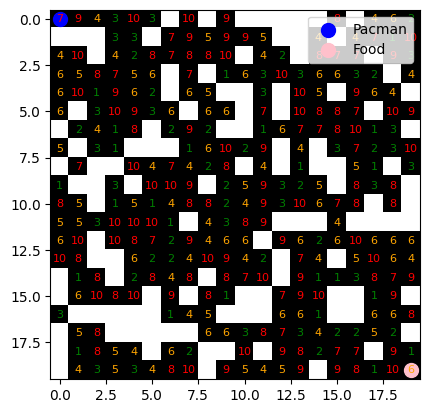

In [75]:
rows, cols = 20, 20
maze, costs, start, goal = generate_maze_with_costs(rows, cols)
plot_maze_with_costs(maze, costs, start=start, goal=goal)

In [76]:
# Search Algorithms
class SearchAlgorithmWithCosts:
    def __init__(self, maze, costs):
        self.maze = maze
        self.costs = costs
        self.rows, self.cols = maze.shape
        self.visited = np.zeros_like(maze)
        self.expanded_nodes = 0

    def get_neighbors(self, pos):
        neighbors = []
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
        for d in directions:
            new_pos = (pos[0] + d[0], pos[1] + d[1])
            if 0 <= new_pos[0] < self.rows and 0 <= new_pos[1] < self.cols and not self.maze[new_pos] and not self.visited[new_pos]:
                neighbors.append(new_pos)
        return neighbors

    def calculate_total_cost(self, path):
        return sum(self.costs[pos] for pos in path)



In [77]:
def plot_algorithms_with_costs(maze, costs, start, goal,name,algorithm):
    path, total_cost = algorithm.search(start, goal)
    result = {'path': path, 'expanded_nodes': algorithm.expanded_nodes, 'total_cost': total_cost}
    print(f"{name}: Expanded Nodes = {algorithm.expanded_nodes}, Total Cost = {total_cost}")
    plot_maze_with_costs(maze, costs, path, start, goal)


In [78]:
class DFSWithCosts(SearchAlgorithmWithCosts):
    def search(self, start, goal):
        stack = [(start, [start], 0)]  # (current_position, path, current_cost)
        best_cost = float('inf')
        best_path = None
        self.visited[start] = 1  # Mark start node as visited
        self.expanded_nodes = 0

        while stack:
            current_pos, path, current_cost = stack.pop()
            self.expanded_nodes += 1

            # Check if we have reached the goal
            if current_pos == goal:
                total_cost = self.calculate_total_cost(path)
                if total_cost < best_cost:
                    best_cost = total_cost
                    best_path = path
                continue

            # Explore neighbors
            for neighbor in self.get_neighbors(current_pos):
                if not self.visited[neighbor]:  # Ensure we only explore unvisited nodes
                    new_path = path + [neighbor]
                    new_cost = current_cost + self.costs[neighbor]
                    self.visited[neighbor] = 1  # Mark the neighbor as visited
                    stack.append((neighbor, new_path, new_cost))

        return best_path, best_cost


DFS: Expanded Nodes = 268, Total Cost = 722


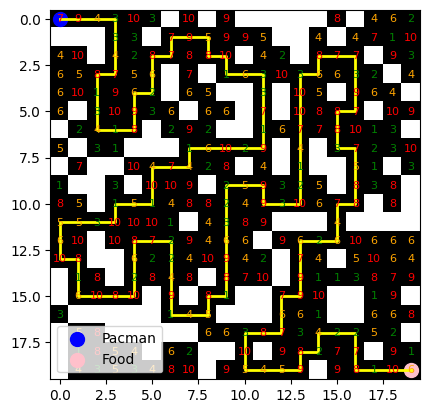

In [79]:
plot_algorithms_with_costs(maze, costs, start, goal, 'DFS', DFSWithCosts(maze, costs))

In [80]:
from collections import deque

class BFSWithCosts(SearchAlgorithmWithCosts):
    def search(self, start, goal):
        queue = deque([(start, [start], 0)])  # (current_position, path, current_cost)
        best_cost = float('inf')
        best_path = None
        self.visited[start] = 1  # Mark the start node as visited
        self.expanded_nodes = 0

        while queue:
            current_pos, path, current_cost = queue.popleft()
            self.expanded_nodes += 1

            # If we have reached the goal
            if current_pos == goal:
                total_cost = self.calculate_total_cost(path)
                if total_cost < best_cost:
                    best_cost = total_cost
                    best_path = path
                continue

            # Explore neighbors
            for neighbor in self.get_neighbors(current_pos):
                if not self.visited[neighbor]:  # Ensure the neighbor hasn't been visited
                    new_path = path + [neighbor]
                    new_cost = current_cost + self.costs[neighbor]
                    self.visited[neighbor] = 1  # Mark the neighbor as visited
                    queue.append((neighbor, new_path, new_cost))

        return best_path, best_cost


BFS: Expanded Nodes = 268, Total Cost = 232


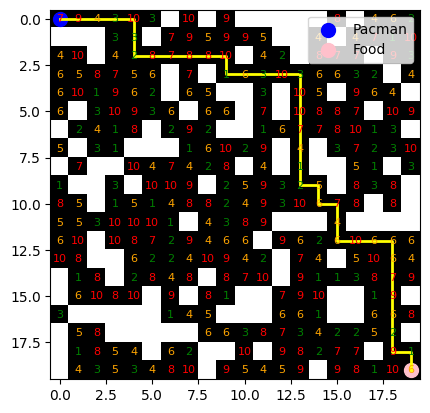

In [81]:
plot_algorithms_with_costs(maze, costs, start, goal,'BFS',BFSWithCosts(maze,costs))

In [82]:
import heapq

class AStarWithCosts(SearchAlgorithmWithCosts):
    def heuristic(self, pos, goal):
        # Use Manhattan distance as the heuristic
        return abs(pos[0] - goal[0]) + abs(pos[1] - goal[1])

    def search(self, start, goal):
        priority_queue = []
        heapq.heappush(priority_queue, (0, start, [start], 0))  # (f_cost, current_position, path, g_cost)
        best_cost = float('inf')
        best_path = None
        g_costs = {start: 0}
        self.visited[start] = 1  # Mark the start node as visited
        self.expanded_nodes = 0

        while priority_queue:
            current_f_cost, current_pos, path, current_g_cost = heapq.heappop(priority_queue)
            self.expanded_nodes += 1

            # If we have reached the goal
            if current_pos == goal:
                total_cost = self.calculate_total_cost(path)
                if total_cost < best_cost:
                    best_cost = total_cost
                    best_path = path
                continue

            # Explore neighbors
            for neighbor in self.get_neighbors(current_pos):
                new_g_cost = current_g_cost + self.costs[neighbor]
                if neighbor not in g_costs or new_g_cost < g_costs[neighbor]:  # Update g_cost if needed
                    g_costs[neighbor] = new_g_cost
                    f_cost = new_g_cost + self.heuristic(neighbor, goal)
                    heapq.heappush(priority_queue, (f_cost, neighbor, path + [neighbor], new_g_cost))
                    self.visited[neighbor] = 1  # Mark the neighbor as visited

        return best_path, best_cost


A*: Expanded Nodes = 268, Total Cost = 177


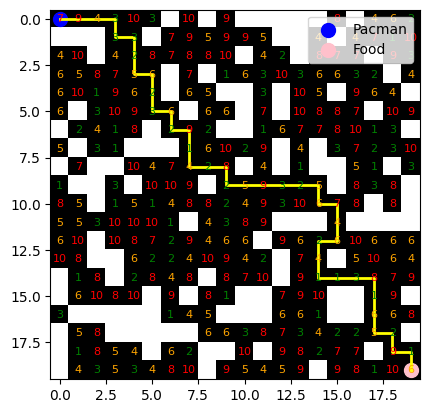

In [83]:
plot_algorithms_with_costs(maze, costs, start, goal,'A*',AStarWithCosts(maze,costs))

Question:

now that you have explored these methods(DFS, BFS,A star) in priced manner, Briefly explain the advantages and disadvantages of each method in the context of the Maze Problem and compare their performance based on your observations.

### Comparison of DFS, BFS, and A* in the Context of a Priced Maze Problem

Now that we’ve implemented and explored **DFS**, **BFS**, and **A*** in a maze where each cell has an entrance cost, we can analyze their advantages, disadvantages, and performance based on several factors, including efficiency, cost, and suitability for different maze structures.

#### **1. DFS (Depth-First Search) with Costs**
  
**Advantages**:
- **Low memory usage**: DFS uses a stack and stores only the current path being explored, making it memory efficient compared to BFS and A*.
- **Simple implementation**: DFS is straightforward to implement, requiring only basic modifications to account for the cost structure.
- **Can find a solution quickly** in some cases: If the maze has a favorable structure where a deep path directly leads to the goal, DFS can be fast.

**Disadvantages**:
- **Does not guarantee the least costly path**: DFS explores as deeply as possible before backtracking, which often leads to suboptimal paths in terms of cost. It may find a path quickly, but that path is unlikely to have the least cost unless by coincidence.
- **Inefficient for large or complex mazes**: DFS can get stuck in long, costly paths without knowing if they will lead to the goal, wasting time on unnecessary exploration.

**Performance Observations**:
- DFS tends to find high-cost paths in the priced maze. It doesn’t factor in the total cost until after a full path has been explored, which results in poor performance when the goal is to minimize cost.
- **Time**: DFS can take a long time to find a solution if it needs to backtrack frequently.
- **Memory**: DFS is more memory-efficient than BFS and A*.

#### **2. BFS (Breadth-First Search) with Costs**

**Advantages**:
- **Guaranteed to find the least-costly path (if all moves have equal costs)**: In unweighted or equally weighted mazes, BFS finds the optimal solution in terms of cost.
- **Complete**: BFS will always find a solution if one exists, given that it explores all nodes level by level.

**Disadvantages**:
- **Memory-intensive**: BFS must store all nodes at the current level of the search, which results in high memory consumption, especially for large mazes.
- **Inefficient in priced mazes**: While BFS can find the shortest path in terms of the number of steps, it doesn't necessarily find the least costly path in a priced maze. It explores every possibility at each level, which makes it slower and less efficient in minimizing costs compared to A*.

**Performance Observations**:
- BFS finds paths that are short in terms of steps, but it doesn't account for the cost effectively. In a priced maze, BFS often expands unnecessary nodes and can result in suboptimal paths in terms of total cost.
- **Time**: BFS tends to be slower in priced mazes, especially when costs vary significantly across cells.
- **Memory**: BFS has high memory consumption as it stores all nodes at the current depth level.

#### **3. A* (A-Star) Search with Costs**

**Advantages**:
- **Guaranteed to find the least costly path**: A* combines the benefits of both BFS and a heuristic to efficiently find the path with the lowest total cost. It optimizes exploration by using both the actual cost (`g_cost`) and the heuristic estimate (`h_cost`) to prioritize nodes that are promising.
- **Efficient use of resources**: A* focuses on nodes that are likely to lead to the goal with minimal cost, reducing unnecessary exploration. This makes it faster and more memory-efficient compared to BFS in priced mazes.

**Disadvantages**:
- **Requires a good heuristic**: The performance of A* depends heavily on the quality of the heuristic used. If the heuristic is not well-suited to the problem, A* may not perform optimally.
- **Memory usage**: While A* is more efficient than BFS, it still requires more memory than DFS since it uses a priority queue to store multiple paths simultaneously.

**Performance Observations**:
- A* consistently finds the least costly path in the priced maze by expanding fewer nodes compared to BFS. It effectively balances between exploring promising nodes (using the heuristic) and accounting for the actual cost.
- **Time**: A* is typically faster than both BFS and DFS in priced mazes due to its heuristic-driven search.
- **Memory**: A* uses less memory than BFS but more than DFS. It expands fewer nodes overall, which reduces both time and memory overhead.

### Summary of Comparisons

| **Algorithm**  | **Optimal Path** | **Time Efficiency** | **Memory Usage** | **Performance in Priced Mazes** |
|----------------|------------------|---------------------|------------------|---------------------------------|
| **DFS**        | No (can find high-cost paths) | Low to Moderate (depends on maze) | Low | Inefficient, often finds costly paths |
| **BFS**        | Yes (if all moves have equal costs) | Low (explores all nodes at each level) | High | Suboptimal in priced mazes, expands unnecessary nodes |
| **A\***        | Yes (least costly path) | High (uses both actual and heuristic costs) | Moderate to High | Most efficient, finds the least costly path with fewer expanded nodes |

### Conclusion

- **DFS** is useful when memory is limited, but it does not perform well in terms of cost optimization and can result in long, costly paths.
- **BFS** works well when all moves have equal costs, but it becomes inefficient when dealing with priced mazes because it explores all paths equally, regardless of cost.
- **A\*** is the most efficient algorithm for solving the priced maze problem. It combines the best aspects of BFS and DFS by using both cost and heuristic information to find the optimal solution while minimizing unnecessary exploration.

In summary, **A*** is the best choice for solving the maze problem with variable cell entrance costs, as it consistently finds the least costly path and does so more efficiently than the other methods.